# Graficos con Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('https://raw.githubusercontent.com/lgreski/pokemonData/master/Pokemon.csv',sep=',')
df.head()

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1


# Orientado a estados

## Barplot

In [2]:
plt.barh?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

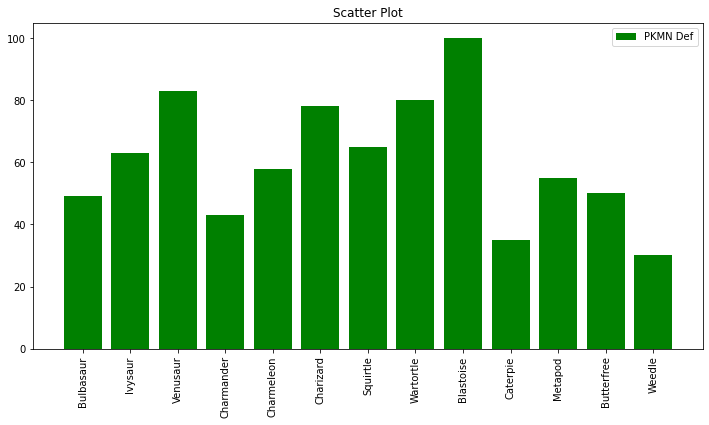

In [3]:
plt.figure(figsize=(12,6))
plt.bar(df['Name'][:13],df['Defense'][:13],label="PKMN Def", color="green")
plt.title("Scatter Plot")
plt.legend()
plt.xticks(rotation=90)

Text(0, 0.5, 'Attack')

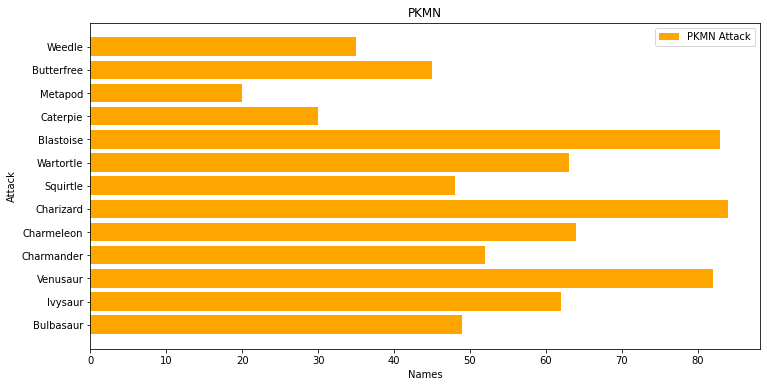

In [4]:
plt.figure(figsize=(12,6))
plt.barh(df['Name'][:13], df['Attack'][:13], label='PKMN Attack',color='orange',)
plt.title("PKMN")
plt.legend()
plt.xlabel("Names")
plt.ylabel("Attack")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

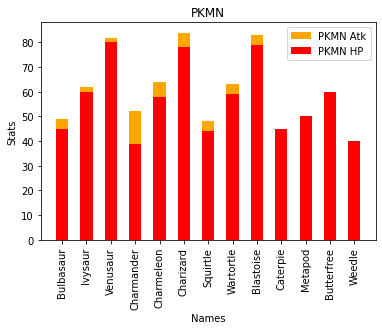

In [6]:
width = 0.5
plt.bar(df['Name'][:13], df['Attack'][:13], label='PKMN Atk', width=width, color='orange')
plt.bar(df['Name'][:13], df['HP'][:13], label='PKMN HP', width=width, color='red')
plt.title("PKMN")
plt.legend()
plt.xlabel("Names")
plt.ylabel("Stats")
plt.xticks(rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


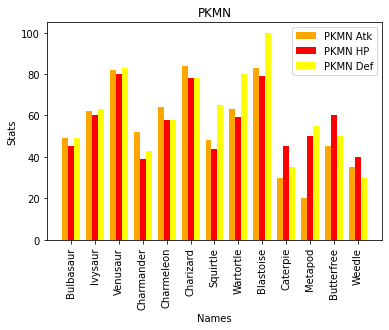

In [7]:
import numpy as np
labels = df['Name'][:13] 
x = np.arange(len(labels))
print(x)
width = 0.25
plt.bar(x - width, df['Attack'][:13], label='PKMN Atk', width=width, color='orange')
plt.bar(x, df['HP'][:13], label='PKMN HP', width=width, color='red')
plt.bar(x + width, df['Defense'][:13], label='PKMN Def', width=width, color='yellow')
#plt.plot(x - width, pk['Attack'][:13], color="blue", label="ATK Line")
#plt.plot(x, pk['HP'][:13], color="purple", label="HP Line")
#plt.plot(x + width, pk['Defense'][:13], color="lightblue", label="DEF Line")
plt.title("PKMN")
plt.xlabel("Names")
plt.ylabel("Stats")
plt.xticks(rotation=90, ticks=x, labels=labels)
plt.legend()

## Histogramas

Text(0, 0.5, 'Frecuencia')

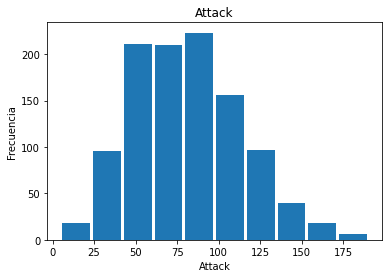

In [8]:
plt.hist(df.Attack,rwidth=0.9)
plt.title('Attack')
plt.xlabel('Attack')
plt.ylabel('Frecuencia')

## Piecharts

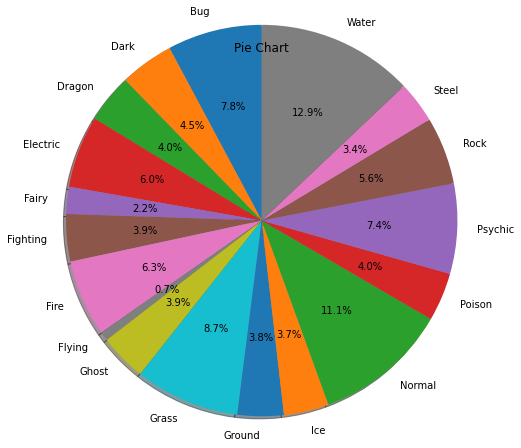

In [9]:
df['count'] = 1
perc = df.groupby(['Type1']).count()['count']
plt.figure(figsize=(12,6))
#colors= ['#4C212A','#01172F','#00635D','#08A4BD','#446DF6']
plt.pie(perc.values, labels=perc.index, startangle=90, autopct='%1.1f%%', shadow=True, radius=1.5)
plt.title("Pie Chart")
plt.savefig('pie_types.png')

Text(0.5, 1.0, 'Pie Chart')

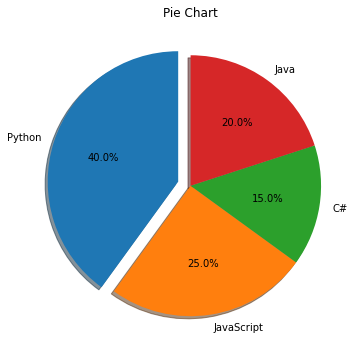

In [11]:
plt.figure(figsize=(12,6))
val = [40,25,15,20]
labels = ['Python', 'JavaScript', 'C#', 'Java']
expl = [0.1,0,0,0]
plt.pie(val, labels=labels, explode=expl, startangle=90, shadow=True, autopct='%1.1f%%', radius=1)
plt.title("Pie Chart")

## Boxplots

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


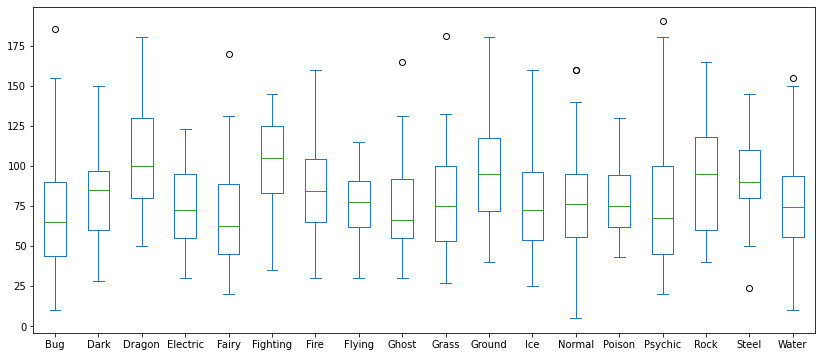

In [14]:
df.assign(index=df.groupby('Type1').cumcount()).pivot('index','Type1','Attack').plot(kind='box',figsize=(14,6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


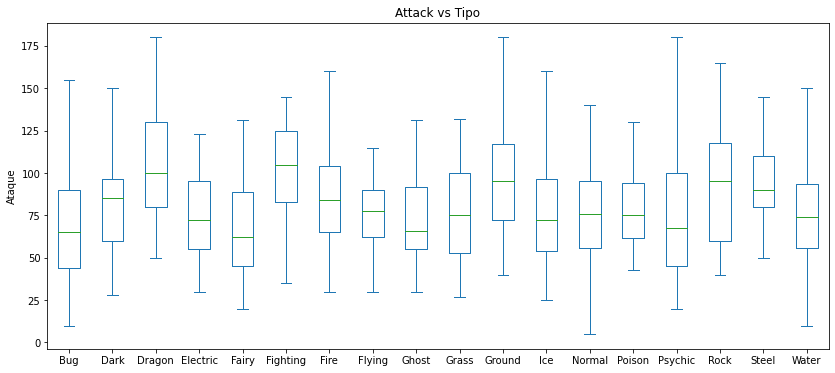

In [15]:
df.assign(index=df.groupby('Type1').cumcount()).pivot('index','Type1','Attack').plot(kind='box',figsize=(14,6),
                                                                                     showfliers=False, xlabel='Tipo 1',
                                                                                     ylabel='Ataque', title='Attack vs Tipo')

## Lineplots

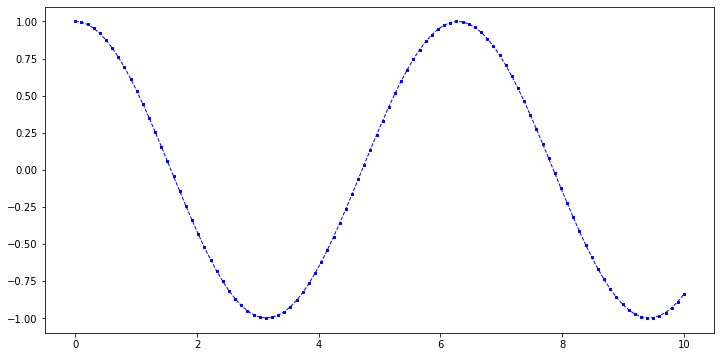

In [16]:
x = np.linspace(0, 10, 100)
y= np.cos(x)
plt.figure(figsize=(12,6))
plt.plot(x,y,linewidth=1.0, color='blue',linestyle='--', marker='s',markersize=2)

## Diagramas de dispersion

Text(0.5, 1.0, 'Scatter Plot')

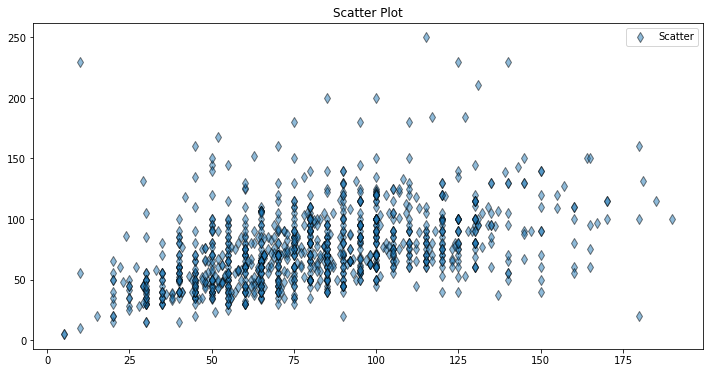

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(df['Attack'],df['Defense'], s=50, marker='d', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
plt.legend()
plt.title('Scatter Plot')

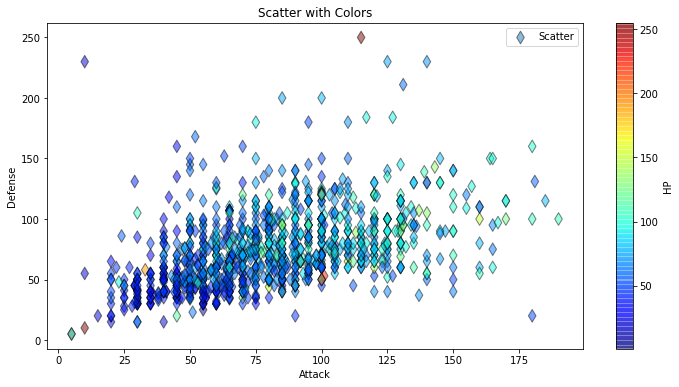

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(df.Attack, df.Defense, c=df.HP, cmap="jet", s=80, marker='d', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
plt.legend()
plt.title('Scatter with Colors')
cbar = plt.colorbar()
plt.xlabel('Attack')
plt.ylabel('Defense')
cbar.set_label('HP')

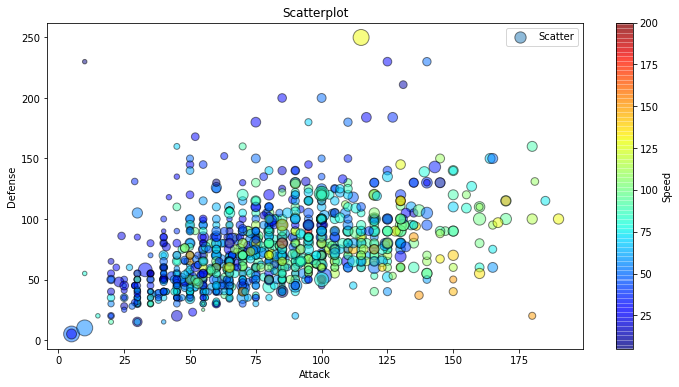

In [20]:
plt.figure(figsize=(12,6))
plt.scatter( df.Attack, df.Defense, c=df.Speed, cmap="jet", s=df.HP, marker='o', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
plt.legend()
plt.title('Scatterplot')
cbar = plt.colorbar()
plt.xlabel('Attack')
plt.ylabel('Defense')
cbar.set_label('Speed')

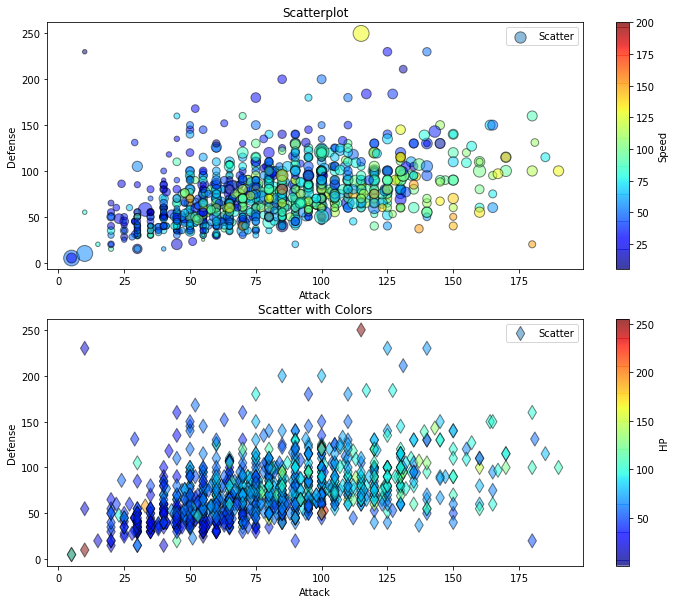

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.scatter( df.Attack, df.Defense, c=df.Speed, cmap="jet", s=df.HP, marker='o', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
plt.legend()
plt.title('Scatterplot')
cbar = plt.colorbar()
plt.xlabel('Attack')
plt.ylabel('Defense')
cbar.set_label('Speed')

plt.subplot(212)
plt.scatter(df.Attack, df.Defense, c=df.HP, cmap="jet", s=100, marker='d', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
plt.legend()
plt.title('Scatter with Colors')
cbar = plt.colorbar()
plt.xlabel('Attack')
plt.ylabel('Defense')
cbar.set_label('HP')

# Orientado a objetos

## Barplots

In [53]:
plt.subplots?

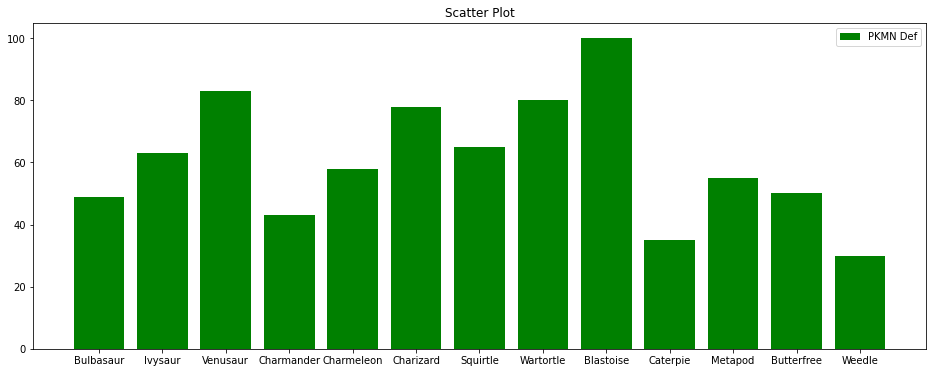

In [22]:
fig,ax= plt.subplots(nrows=1, ncols=1,figsize=(16,6))
ax.bar(df['Name'][:13],df['Defense'][:13],label="PKMN Def", color="green")
ax.set_title("Scatter Plot")
ax.legend(loc='best')

In [23]:
fig.savefig('figura_x.png')

## Histogramas

Text(0, 0.5, 'Frecuencia')

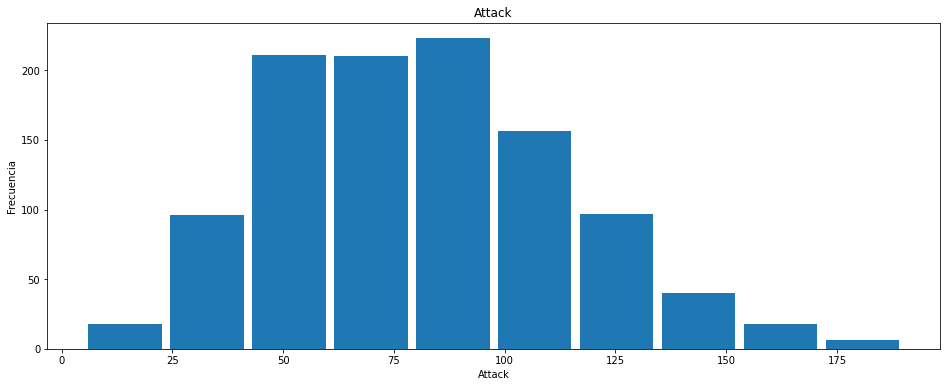

In [24]:
fig,ax= plt.subplots(nrows=1, ncols=1,figsize=(16,6))
ax.hist(df.Attack,rwidth=0.9)
ax.set_title('Attack')
ax.set_xlabel('Attack')
ax.set_ylabel('Frecuencia')

## Piecharts

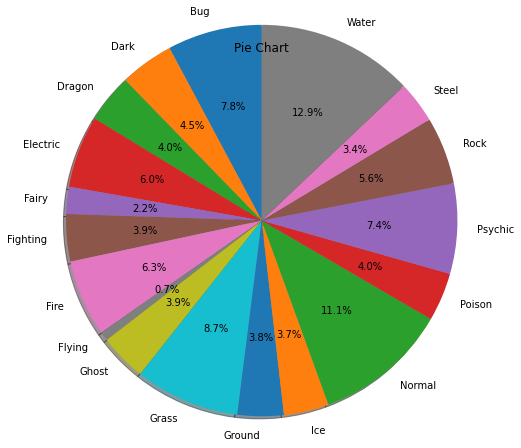

In [25]:
fig,ax= plt.subplots(nrows=1, ncols=1,figsize=(16,6))
df['count'] = 1
perc = df.groupby(['Type1']).count()['count']
#colors= ['#4C212A','#01172F','#00635D','#08A4BD','#446DF6']
ax.pie(perc.values, labels=perc.index, startangle=90, autopct='%1.1f%%', shadow=True, radius=1.5)
ax.set_title("Pie Chart")
fig.savefig('pie_types.png')

## Boxplots

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


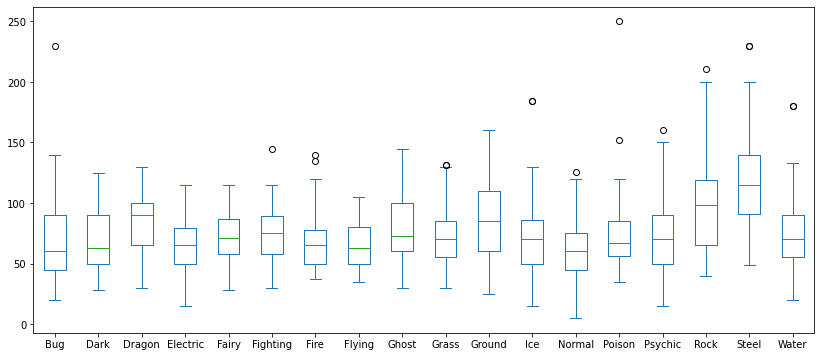

In [26]:
df.assign(index=df.groupby('Type1').cumcount()).pivot('index','Type1','Defense').plot(kind='box',figsize=(14,6))

## Lineplots

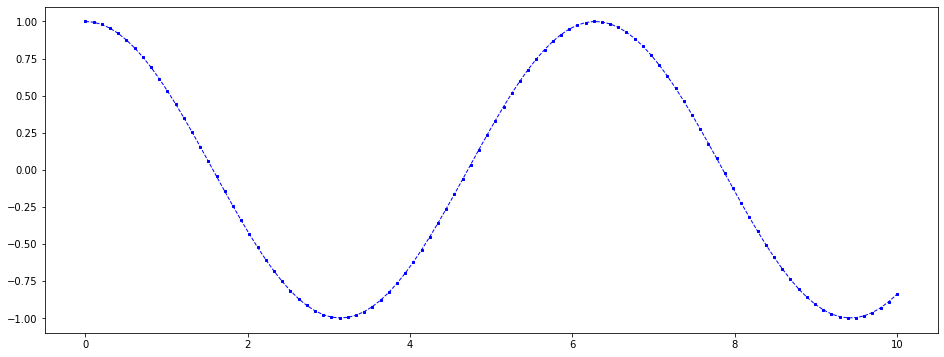

In [27]:
x = np.linspace(0, 10, 100)
y= np.cos(x)
fig,ax= plt.subplots(nrows=1, ncols=1,figsize=(16,6))
ax.plot(x,y,linewidth=1.0, color='blue',linestyle='--', marker='s',markersize=2)

## Diagramas de dispersión

In [28]:
df.HP.max()

255

Text(0, 0.5, 'Defense')

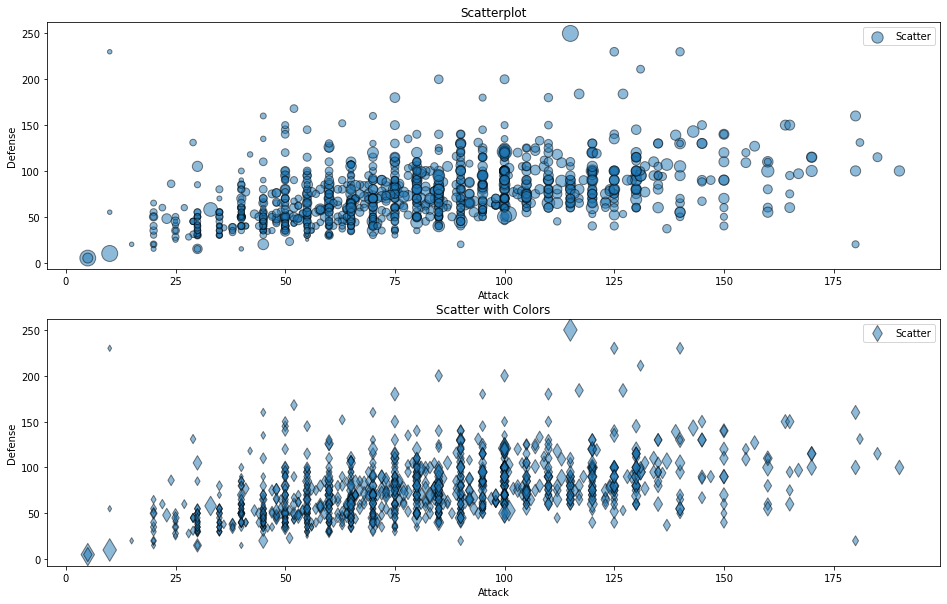

In [29]:
import matplotlib as mpl
fig,ax= plt.subplots(nrows=2, ncols=1,figsize=(16,10))
ax[0].scatter( df.Attack, df.Defense, cmap="jet", s=df.HP, marker='o', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
ax[0].legend()
ax[0].set_title('Scatterplot')
ax[0].set_xlabel('Attack')
ax[0].set_ylabel('Defense')

ax[1].scatter(df.Attack, df.Defense, cmap="jet", s=df.HP, marker='d', edgecolors='black', linewidths=1, alpha=0.50, label="Scatter")
ax[1].legend()
ax[1].set_title('Scatter with Colors')
ax[1].set_xlabel('Attack')
ax[1].set_ylabel('Defense')
